In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Import unscaled CSV data
url = 'https://raw.githubusercontent.com/bdrewr/FinalProjectSDS384/main/ExcelAreaFiles/AE_UTSRP_Filled_2.csv' #unscaled data new URL
data_unscaled = pd.read_csv(url)
data_unscaled = data_unscaled.drop(labels=['Unnamed: 0', 'void fraction', 'Glycerol', '[alk]'], axis='columns')
data_unscaled.info()
data_unscaled.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Packing Type            983 non-null    object 
 1   Height                  983 non-null    float64
 2   specific area           983 non-null    int64  
 3   Corrugation angle       902 non-null    float64
 4   S, Channel Side         902 non-null    float64
 5   B, Channel Base         902 non-null    float64
 6   h, Crimp height         902 non-null    float64
 7   packing element height  409 non-null    float64
 8   LP/A                    840 non-null    float64
 9   L                       983 non-null    float64
 10  uG                      983 non-null    float64
 11  T Corr                  983 non-null    float64
 12  DelP                    493 non-null    float64
 13  k OH E-3                830 non-null    float64
 14  DCO2 E9                 983 non-null    fl

,Packing Type,Height,specific area,Corrugation angle,"S, Channel Side","B, Channel Base","h, Crimp height",packing element height,LP/A,L,...,DCO2 E9,HCO2 E-5,[OH-],CO2 in,CO2 out,Fractional Area,ReL,WeL E4,FrL,Who?
0,M250Y,3.1,250,45.0,0.16,0.024,0.011,242.4242,242424.24,2.0,...,1.49,21.8,0.1055,411.0,302.0,0.67,2.70,10.0,0.64,Tsai
1,M250Y,3.1,250,45.0,0.16,0.024,0.011,242.4242,242424.24,6.0,...,1.47,21.6,0.1020,410.0,286.0,0.80,6.40,45.0,1.51,Tsai
2,M250Y,3.1,250,45.0,0.16,0.024,0.011,242.4242,242424.24,12.0,...,1.42,20.8,0.1009,410.0,282.0,0.84,12.54,146.0,2.96,Tsai
3,M250Y,3.1,250,45.0,0.16,0.024,0.011,242.4242,242424.24,18.0,...,1.40,20.6,0.1007,409.0,279.0,0.88,18.46,284.0,4.35,Tsai
4,M250Y,3.1,250,45.0,0.16,0.024,0.011,242.4242,242424.24,24.0,...,1.39,20.3,0.0997,409.0,276.0,0.91,24.34,457.0,5.74,Tsai


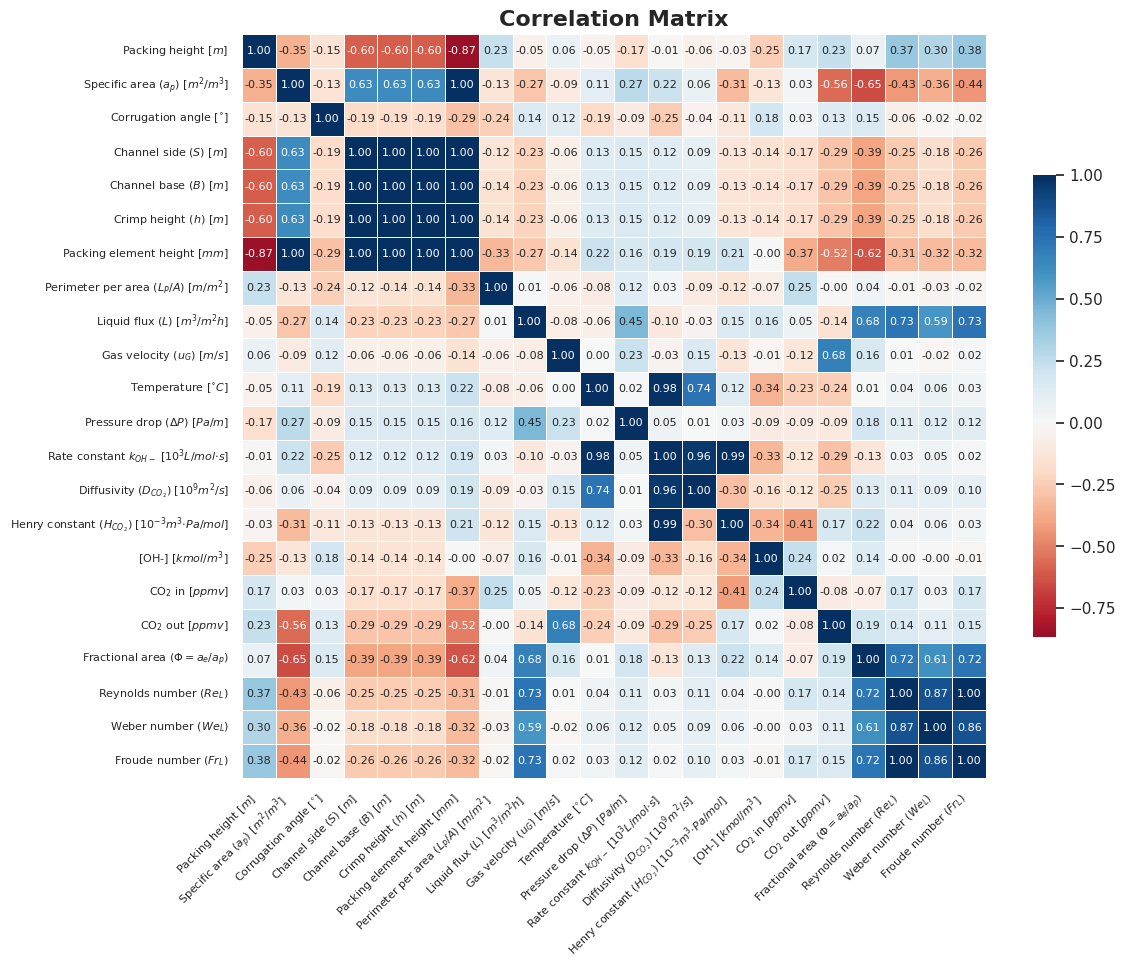

In [ ]:
import seaborn as sns

# Select only the columns with numerical data
numerical_cols = data_unscaled.select_dtypes(include=[float, int]).columns

# Compute correlation matrix
corr = data_unscaled[numerical_cols].corr()

# Define custom labels
labels = [r'Packing height $[m]$',
          r'Specific area $(a_p)$ $[m^2/m^3]$',
          r'Corrugation angle $[^{\circ}]$',
          r'Channel side $(S)$ $[m]$',
          r'Channel base $(B)$ $[m]$',
          r'Crimp height $(h)$ $[m]$',
          r'Packing element height $[mm]$',
          r'Perimeter per area $(L_P/A)$ $[m/m^2]$',
          r'Liquid flux $(L)$ $[m^3/m^2h]$',
          r'Gas velocity $(u_G)$ $[m/s]$',
          r'Temperature $[^{\circ}C]$',
          r'Pressure drop $({\Delta}P)$ $[Pa/m]$',
          r'Rate constant $k_{OH-}$ $[10^3L/mol{\cdot}s]$',
          r'Diffusivity $(D_{CO_2})$ $[10^9 m^2/s]$',
          r'Henry constant $(H_{CO_2})$ $[10^{-3}m^3{\cdot}Pa/mol]$',
          r'[OH-] $[kmol/m^3]$',
          r'CO$_2$ in $[ppmv]$',
          r'CO$_2$ out $[ppmv]$',
          r'Fractional area $({\Phi}=a_e/a_p)$',
          r'Reynolds number $(Re_L)$',
          r'Weber number $(We_L)$',
          r'Froude number $(Fr_L)$']

# Set up the plot
sns.set(style="white")
fig, ax = plt.subplots(figsize=(12, 12))

# Generate heatmap
sns.heatmap(corr, cmap='RdBu', center=0, annot=True, fmt='.2f', square=True,
            annot_kws={"size": 8}, linewidths=.5, cbar_kws={"shrink": .5},
            xticklabels=labels, yticklabels=labels, ax=ax)

# Customize plot labels
ax.set_title('Correlation Matrix', fontsize=16, weight='bold')
ax.tick_params(labelsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Set x,y axis label font sizes
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)

# Show plot
plt.show()
